In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
gompertz = pd.read_csv('CovidColombia.csv', low_memory=False, usecols= ['ID de caso', 'Fecha de notificación', 
                                                                        'Ciudad de ubicación', 
                                                                        'Departamento o Distrito '], 
                                                                        parse_dates=['Fecha de notificación'] )

In [4]:
gompertz.sort_values(by=['Fecha de notificación'],inplace=True)

In [5]:
gompertz['Fecha de notificación']= gompertz['Fecha de notificación'].dt.floor('d')

In [6]:
df = pd.DataFrame(gompertz['Fecha de notificación']).loc[0]


In [7]:
a = gompertz.loc[0,'Fecha de notificación']

In [8]:
b = np.datetime64('today') 
b

numpy.datetime64('2020-08-12')

In [9]:
longitud = (b-a)/ np.timedelta64(1, 'D')
longitud=int(longitud)-1
longitud

162

In [10]:
df_fechas = pd.DataFrame(df).transpose()
df_fechas

,Fecha de notificación
0,2020-03-02


In [11]:
df_fechas['ID de caso']=0

In [12]:
df_fechas

,Fecha de notificación,ID de caso
0,2020-03-02,0


In [13]:
pd.to_datetime([df_fechas.loc[0,'Fecha de notificación']])


DatetimeIndex(['2020-03-02'], dtype='datetime64[ns]', freq=None)

In [14]:
(np.datetime64(df_fechas.loc[0, 'Fecha de notificación']) + np.timedelta64(1,'D'))

numpy.datetime64('2020-03-03T00:00:00.000000')

In [15]:
for i in range(1,longitud):
    df_fechas.loc[(i)] = [(np.datetime64(df_fechas.loc[i-1, 'Fecha de notificación']) + np.timedelta64(1,'D')),0]
    

In [16]:
df_fechas

,Fecha de notificación,ID de caso
0,2020-03-02,0
1,2020-03-03,0
2,2020-03-04,0
3,2020-03-05,0
4,2020-03-06,0
5,2020-03-07,0
6,2020-03-08,0
7,2020-03-09,0
8,2020-03-10,0
9,2020-03-11,0


In [17]:
departamento = 'Caldas'

In [18]:
filtro = gompertz['Departamento o Distrito '] == departamento
gompertz_dpto = gompertz.loc[filtro,:]

In [19]:
gompertz_dpto=gompertz_dpto.append(df_fechas).sort_values(by=['Fecha de notificación'], ignore_index=True)


In [20]:
gompertz_dpto

,ID de caso,Fecha de notificación,Ciudad de ubicación,Departamento o Distrito
0,0,2020-03-02,NaN,NaN
1,0,2020-03-03,NaN,NaN
2,0,2020-03-04,NaN,NaN
3,0,2020-03-05,NaN,NaN
4,0,2020-03-06,NaN,NaN
...,...,...,...,...
1573,382077,2020-08-08,La Dorada,Caldas
1574,0,2020-08-08,NaN,NaN
1575,394046,2020-08-09,Marmato,Caldas
1576,0,2020-08-09,NaN,NaN


In [21]:
longitud = gompertz_dpto['ID de caso'].size
longitud

1578

In [22]:
gompertz_dpto.columns


Index(['ID de caso', 'Fecha de notificación', 'Ciudad de ubicación',
       'Departamento o Distrito '],
      dtype='object')

In [23]:
for i in range(0, longitud):
    if gompertz_dpto.loc[i, 'ID de caso'] == 0:
        pass
    else:
        gompertz_dpto.loc[i, 'ID de caso'] = 1

In [24]:
gompertz_dpto

,ID de caso,Fecha de notificación,Ciudad de ubicación,Departamento o Distrito
0,0,2020-03-02,NaN,NaN
1,0,2020-03-03,NaN,NaN
2,0,2020-03-04,NaN,NaN
3,0,2020-03-05,NaN,NaN
4,0,2020-03-06,NaN,NaN
...,...,...,...,...
1573,1,2020-08-08,La Dorada,Caldas
1574,0,2020-08-08,NaN,NaN
1575,1,2020-08-09,Marmato,Caldas
1576,0,2020-08-09,NaN,NaN


In [25]:
gompertz_dpto['Acumulados']= 0
gompertz_dpto['Día número']=0
gompertz_dpto['Penetración real']=0
gompertz_dpto

,ID de caso,Fecha de notificación,Ciudad de ubicación,Departamento o Distrito,Acumulados,Día número,Penetración real
0,0,2020-03-02,NaN,NaN,0,0,0
1,0,2020-03-03,NaN,NaN,0,0,0
2,0,2020-03-04,NaN,NaN,0,0,0
3,0,2020-03-05,NaN,NaN,0,0,0
4,0,2020-03-06,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...
1573,1,2020-08-08,La Dorada,Caldas,0,0,0
1574,0,2020-08-08,NaN,NaN,0,0,0
1575,1,2020-08-09,Marmato,Caldas,0,0,0
1576,0,2020-08-09,NaN,NaN,0,0,0


In [26]:
gompertz_dpto.loc[0, 'Acumulados']= gompertz_dpto.loc[0, 'ID de caso']
for i in range(1, longitud):
    gompertz_dpto.loc[i,'Acumulados'] = gompertz_dpto.loc[i, 'ID de caso'] + gompertz_dpto.loc[i-1, 'Acumulados']

In [27]:
gompertz_dpto

,ID de caso,Fecha de notificación,Ciudad de ubicación,Departamento o Distrito,Acumulados,Día número,Penetración real
0,0,2020-03-02,NaN,NaN,0,0,0
1,0,2020-03-03,NaN,NaN,0,0,0
2,0,2020-03-04,NaN,NaN,0,0,0
3,0,2020-03-05,NaN,NaN,0,0,0
4,0,2020-03-06,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...
1573,1,2020-08-08,La Dorada,Caldas,1415,0,0
1574,0,2020-08-08,NaN,NaN,1415,0,0
1575,1,2020-08-09,Marmato,Caldas,1416,0,0
1576,0,2020-08-09,NaN,NaN,1416,0,0


In [28]:
gompertz_dpto = gompertz_dpto.groupby('Fecha de notificación')[['ID de caso', 'Ciudad de ubicación',
       'Departamento o Distrito ', 'Acumulados', 'Día número',
       'Penetración real']].max()

In [29]:
gompertz_dpto

,ID de caso,Ciudad de ubicación,Departamento o Distrito,Acumulados,Día número,Penetración real
Fecha de notificación,,,,,,
2020-03-02,0,NaN,NaN,0,0,0
2020-03-03,0,NaN,NaN,0,0,0
2020-03-04,0,NaN,NaN,0,0,0
2020-03-05,0,NaN,NaN,0,0,0
2020-03-06,0,NaN,NaN,0,0,0
2020-03-07,0,NaN,NaN,0,0,0
2020-03-08,0,NaN,NaN,0,0,0
2020-03-09,0,NaN,NaN,0,0,0
2020-03-10,0,NaN,NaN,0,0,0


In [30]:
gompertz_dpto.reset_index(inplace=True)

In [31]:
longitud = gompertz_dpto['ID de caso'].size
longitud

162

In [32]:
gompertz_dpto.loc[0, 'Día número'] = 1
for i in range(1, longitud):
    gompertz_dpto.loc[i,'Día número'] = i+1
    gompertz_dpto.loc[i,'Penetración real'] = gompertz_dpto.loc[i, 'Acumulados']/ gompertz_dpto.loc[longitud-1, 'Acumulados']
    

In [33]:
gompertz_dpto


,Fecha de notificación,ID de caso,Ciudad de ubicación,Departamento o Distrito,Acumulados,Día número,Penetración real
0,2020-03-02,0,NaN,NaN,0,1,0.000000
1,2020-03-03,0,NaN,NaN,0,2,0.000000
2,2020-03-04,0,NaN,NaN,0,3,0.000000
3,2020-03-05,0,NaN,NaN,0,4,0.000000
4,2020-03-06,0,NaN,NaN,0,5,0.000000
5,2020-03-07,0,NaN,NaN,0,6,0.000000
6,2020-03-08,0,NaN,NaN,0,7,0.000000
7,2020-03-09,0,NaN,NaN,0,8,0.000000
8,2020-03-10,0,NaN,NaN,0,9,0.000000
9,2020-03-11,0,NaN,NaN,0,10,0.000000


In [34]:

gompertz_dpto.to_excel('datosTotalesparaGompertzDpto.xlsx')






In [62]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [112]:
from matplotlib import pyplot as plt

plt.style.use('tableau-colorblind10')
#plt.xkcd()

No handles with labels found to put in legend.


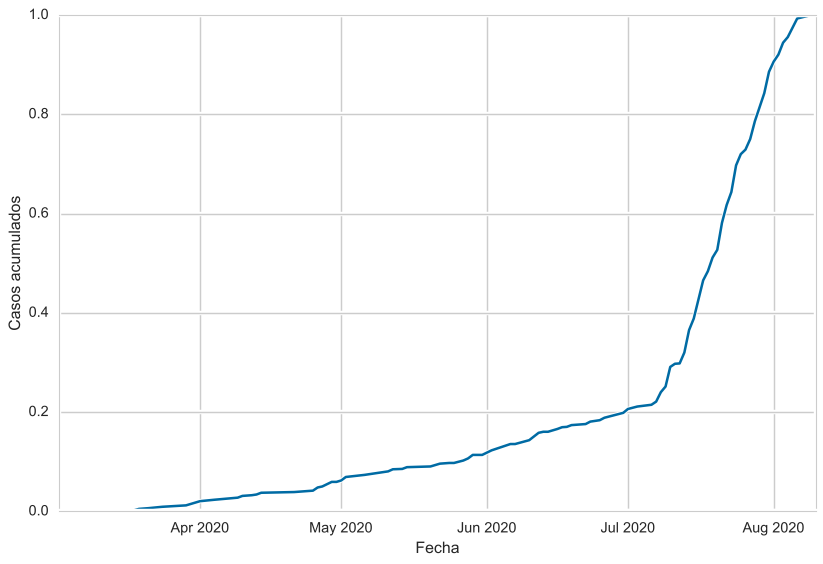

In [113]:
eje_x = gompertz_dpto['Fecha de notificación']

plt.plot(eje_x, gompertz_dpto['Penetración real'])
#plt.plot(eje_x, gompertz_dpto['Acumulados'], label='CASOS')

plt.xlabel('Fecha')
plt.ylabel('Casos acumulados')
plt.legend()
plt.tight_layout()
         
plt.show()